In [1]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import multimode_systems.architecture_optimizer_new as arch_opt
import multimode_systems.constraints as msc

In [2]:
optimizer = arch_opt.Architecture_Optimizer(
    S_target = sp.Matrix([[0,0],[1,0]]),
    num_auxiliary_modes=1,
)
irreducible_graphs = optimizer.perform_depth_first_search()

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 221508.48it/s]


216 graphs identified
start depth-first search
complexity level: 9


100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


complexity level: 8


100%|██████████| 6/6 [00:00<00:00, 85.79it/s]


complexity level: 7


100%|██████████| 15/15 [00:00<00:00, 26.77it/s]


complexity level: 6


100%|██████████| 10/10 [00:00<00:00, 68.96it/s]


complexity level: 5


0it [00:00, ?it/s]


complexity level: 4


0it [00:00, ?it/s]


complexity level: 3


0it [00:00, ?it/s]


complexity level: 2


0it [00:00, ?it/s]


complexity level: 1


0it [00:00, ?it/s]


complexity level: 0


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


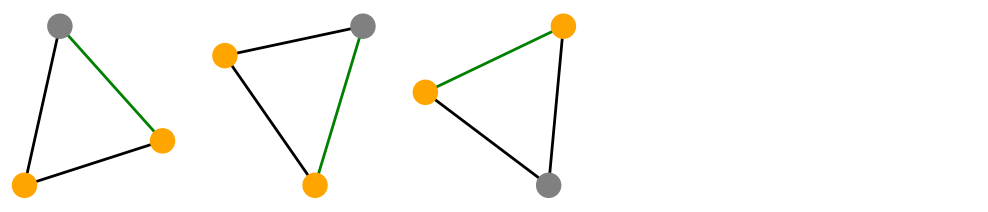

In [3]:
node_colors = ['orange', 'orange', 'gray'] # the port modes are orange, the auxiliary mode gray
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)

In [7]:
optimizer = arch_opt.Architecture_Optimizer(
    S_target = sp.Matrix([[0,0,1],[1,0,0],[0,1,0]]),
    num_auxiliary_modes=0,
    make_initial_test=False
)
# irreducible_graphs = optimizer.perform_depth_first_search()

In [15]:
initial_guess, _ = optimizer.create_initial_guess([])
initial_guess

array([-0.66073301,  0.34407834, -0.49591842, -0.0468692 ,  0.378649  ,
        0.49821961, -1.09825294,  2.27809167,  1.70413754,  3.11583023,
       -2.4831373 , -0.32405367])

In [14]:
optimizer.conditions_func(initial_guess)

TypeError: _lambdifygenerated() missing 1 required positional argument: 'epsilon'